### Deliverable 3 - Optimization Trial 1
##### Remove outliers from ASK_AMT


#### Start with Deliveable 1 Code: Preprocessing the Data for a Neural Network

In [150]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [151]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#application_df_new=application_df.drop(columns=["EIN", "NAME"])
application_df_new=application_df.drop(columns=["EIN", "NAME"])
application_df_new.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [152]:
#function to identify limits for outliers based on IQR
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [153]:
lowerbound,upperbound = outlier_treatment(application_df_new.ASK_AMT)

In [154]:
print(lowerbound)
print(upperbound)

887.0
11855.0


In [155]:
ask_amt_filtered=ask_amt[(ask_amt < lowerbound) | (ask_amt > upperbound)]
ask_amt_filtered 

1          108590
4          142590
6           31452
7         7508025
8           94389
           ...   
34280      401661
34281       56261
34284     3384856
34289       20197
34298    36500179
Name: ASK_AMT, Length: 8206, dtype: int64

In [156]:
application_df_new=application_df_new.loc[(application_df_new["ASK_AMT"] < upperbound) & (application_df_new["ASK_AMT"] > lowerbound)]
application_df_new

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
...,...,...,...,...,...,...,...,...,...,...
34293,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,1
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0


In [157]:
# Generate our categorical variable list
application_cat = application_df_new.dtypes[application_df_new.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [158]:
# Determine the number of unique values in each column.
application_df_new[application_cat].nunique()

APPLICATION_TYPE          12
AFFILIATION                6
CLASSIFICATION            65
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [159]:
# Generate our variable list
application_all_var = application_df_new.dtypes.index.tolist()
application_all_var

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT',
 'IS_SUCCESSFUL']

In [160]:
# Determine the number of unique values in each column.
application_df_new[application_all_var].nunique()

APPLICATION_TYPE           12
AFFILIATION                 6
CLASSIFICATION             65
USE_CASE                    5
ORGANIZATION                4
STATUS                      2
INCOME_AMT                  9
SPECIAL_CONSIDERATIONS      2
ASK_AMT                   656
IS_SUCCESSFUL               2
dtype: int64

In [161]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df_new.APPLICATION_TYPE.value_counts()
application_type_counts

T3     20086
T4      1331
T19      999
T5       894
T6       882
T8       669
T7       633
T10      508
T13       54
T9        18
T12       13
T2         6
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

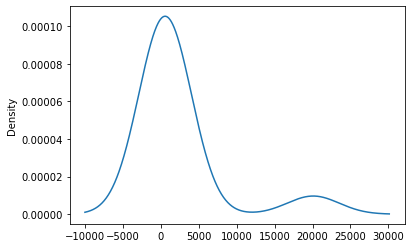

In [162]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [163]:
# Determine which values to replace if counts are less than ...?
replace_application=list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for i in replace_application:
    application_df_new.APPLICATION_TYPE = application_df_new.APPLICATION_TYPE.replace(i,"Other")
    
# Check to make sure binning was successful
application_df_new.APPLICATION_TYPE.value_counts()

T3       20086
T4        1331
T19        999
T5         894
T6         882
T8         669
T7         633
T10        508
Other       91
Name: APPLICATION_TYPE, dtype: int64

In [164]:
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df_new.CLASSIFICATION.value_counts()
classification_counts

C1000    12557
C2000     4693
C1200     3997
C2100     1623
C3000     1537
         ...  
C1732        1
C1728        1
C4120        1
C1245        1
C2150        1
Name: CLASSIFICATION, Length: 65, dtype: int64

<AxesSubplot:ylabel='Density'>

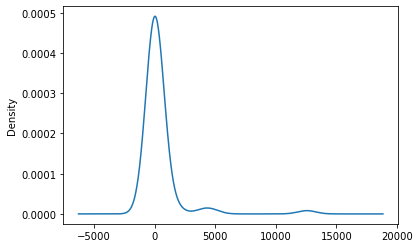

In [165]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [166]:
# Determine which values to replace if counts are less than ..?
replace_class=list(classification_counts[classification_counts < 1500].index)

# Replace in dataframe
for j in replace_class:
    application_df_new.CLASSIFICATION = application_df_new.CLASSIFICATION.replace(j,"Other")
    
# Check to make sure binning was successful
application_df_new.CLASSIFICATION.value_counts()

C1000    12557
C2000     4693
C1200     3997
Other     1686
C2100     1623
C3000     1537
Name: CLASSIFICATION, dtype: int64

In [167]:
# Generate our categorical variable lists
application_cat = application_df_new.dtypes[application_df_new.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [168]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df_new[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [169]:
# Merge one-hot encoded features and drop the originals
application_df_new = application_df_new.merge(encode_df,left_index=True, right_index=True)
application_df_new = application_df_new.drop(application_cat,1)
pd.set_option('display.max_columns', None)
application_df_new.head()

C:\Users\laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [170]:
# Split our preprocessed data into our features and target arrays
y = application_df_new["IS_SUCCESSFUL"].values
X = application_df_new.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [171]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Compile, Train and Evaluate the Model using different inputs for optimization

#### Attempt 1 to achieve higher than 75% Model Accuracy

In [172]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
#hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
# Add our first Dense layer, including the input layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

##another way to write it
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# #  YOUR CODE GOES HERE

# nn_model = tf.keras.models.Sequential()

# # First hidden layer
# #  YOUR CODE GOES HERE
# # Add our first Dense layer, including the input layer
# nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=43))

# # Second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=2))

# # Output layer
# #  YOUR CODE GOES HERE
# # Add the output layer that uses a probability activation function
# nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# # Check the structure of the model
# nn_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                3520      
                                                                 
 dense_10 (Dense)            (None, 30)                2430      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [173]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [174]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 

Epoch 1/50
470/470 [==============================] - 1s 663us/step - loss: 0.6997 - accuracy: 0.5205
Epoch 2/50
470/470 [==============================] - 0s 657us/step - loss: 0.6933 - accuracy: 0.5314
Epoch 3/50
470/470 [==============================] - 0s 659us/step - loss: 0.6915 - accuracy: 0.5409
Epoch 4/50
470/470 [==============================] - 0s 655us/step - loss: 0.6898 - accuracy: 0.5379
Epoch 5/50
470/470 [==============================] - 0s 670us/step - loss: 0.6895 - accuracy: 0.5350
Epoch 6/50
470/470 [==============================] - 0s 663us/step - loss: 0.6885 - accuracy: 0.5409
Epoch 7/50
470/470 [==============================] - 0s 651us/step - loss: 0.6881 - accuracy: 0.5441
Epoch 8/50
470/470 [==============================] - 0s 651us/step - loss: 0.6878 - accuracy: 0.5389
Epoch 9/50
470/470 [==============================] - 0s 654us/step - loss: 0.6878 - accuracy: 0.5406
Epoch 10/50
470/470 [==============================] - 0s 653us/step - loss: 0.687

In [175]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

157/157 - 0s - loss: 0.7029 - accuracy: 0.5217 - 144ms/epoch - 918us/step
Loss: 0.7029232382774353, Accuracy: 0.521652340888977


<AxesSubplot:>

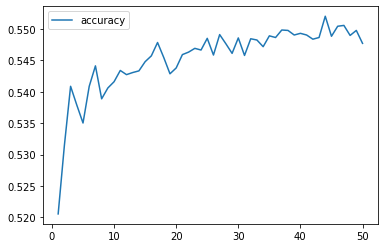

In [176]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [177]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimize1/",exist_ok=True)
checkpoint_path = "checkpoints_optimize1/weights.{epoch:02d}.hdf5"

In [178]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch",
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
470/470 [==============================] - 1s 664us/step - loss: 0.6797 - accuracy: 0.5483
Epoch 2/50
470/470 [==============================] - 0s 665us/step - loss: 0.6795 - accuracy: 0.5494
Epoch 3/50
470/470 [==============================] - 0s 658us/step - loss: 0.6790 - accuracy: 0.5505
Epoch 4/50
470/470 [==============================] - 0s 659us/step - loss: 0.6788 - accuracy: 0.5484
Epoch 5/50
464/470 [============================>.] - ETA: 0s - loss: 0.6789 - accuracy: 0.5499
Epoch 5: saving model to checkpoints_optimize1\weights.05.hdf5
470/470 [==============================] - 0s 672us/step - loss: 0.6789 - accuracy: 0.5498
Epoch 6/50
470/470 [==============================] - 0s 659us/step - loss: 0.6790 - accuracy: 0.5515
Epoch 7/50
470/470 [==============================] - 0s 675us/step - loss: 0.6782 - accuracy: 0.5504
Epoch 8/50
470/470 [==============================] - 0s 663us/step - loss: 0.6783 - accuracy: 0.5501
Epoch 9/50
470/470 [================

In [179]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization1.h5")